# CS638 Vision Zero Madison

### Author: Ming Hsuan, Kuo
#### Group: 2

#### Last Update time: 10/3


## Fisrt Question: What can be the major factor that makes car crash happen?

### Potential factors:
- Weather Conditions ex: Snow, Rain, Hot day etc
- School season ex: Summer/Winter break, Fall/Spring semester
- Government Policy ex: Drunk and drive policy

#### Background found by my teammates

1. Most of the accidents are labeled "Property Damaged", which are minor accidents.
2. If catogorizing the data into intersect and non-intersect, the split is 55%/45%.

In [6]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
#from matplotlib.dates import date2num
import seaborn as sns
import chart_studio.plotly as py
import plotly.tools as tls
#from pandas.plotting import register_matplotlib_converters
#register_matplotlib_converters()
import warnings
warnings.filterwarnings('ignore')
from collections import deque

# read data
df = pd.read_csv('Madison_crash_2009_2019.csv')


##### Preparing data

Get month and year bin

In [7]:
dftime= pd.to_datetime(df["ACCDDATE"])
df["ACCDMONTH"] = ""
df["ACCDYEAR"] = ""
for i in range(len(dftime)):
    #get month bin
    df["ACCDMONTH"][i] = dftime[i].month
    if dftime[i].year != 2019:
        #get year bin
        df["ACCDYEAR"][i] = dftime[i].year
    else:
        df["ACCDYEAR"][i] = None


### Distribution plot
- plot according to monthly accident count.
- Lines are seperated by year to check if the trend of accident migrates.


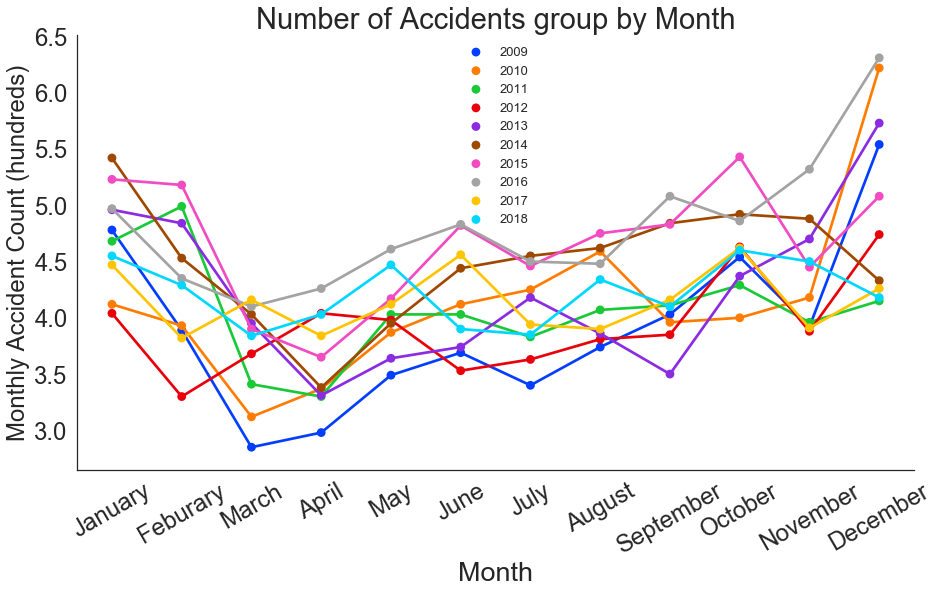

In [8]:
ACCDMONTH_ACCDYEAR = df.groupby(['ACCDMONTH','ACCDYEAR']).count()['DOCTNMBR'].to_frame().reset_index()
fontSize = 24
sns.set(font_scale=1.5,style="white")
plt.figure(figsize=(15,8))
ACCDMONTH_ACCDYEAR_POINTPLOT = sns.pointplot(x='ACCDMONTH', y='DOCTNMBR', hue='ACCDYEAR', data=ACCDMONTH_ACCDYEAR, palette = 'bright',capsize=0.1, frameon = False)
ACCDMONTH_ACCDYEAR_LEG = ACCDMONTH_ACCDYEAR_POINTPLOT.get_legend_handles_labels()[0]

# set up legend
x_tick_year_list = [i for i in range(2009,2019)]
ACCDMONTH_ACCDYEAR_POINTPLOT.legend(ACCDMONTH_ACCDYEAR_LEG, x_tick_year_list, frameon = False, title='',fontsize = 13)
ACCDMONTH_ACCDYEAR_POINTPLOT.set_title('Number of Accidents group by Month', fontsize = fontSize + 5)
ACCDMONTH_ACCDYEAR_POINTPLOT.set_xlabel('Month', fontsize = fontSize + 3)
ACCDMONTH_ACCDYEAR_POINTPLOT.set_ylabel('Monthly Accident Count (hundreds)', fontsize = fontSize)

# set up x,y tick labels
month_list = ["January","Feburary","March","April","May","June","July","August","September","October","November","December"]
ACCDMONTH_ACCDYEAR_POINTPLOT.set_xticklabels(month_list, rotation=30, fontsize = fontSize)
ticks = ACCDMONTH_ACCDYEAR_POINTPLOT.get_yticks()/100
ACCDMONTH_ACCDYEAR_POINTPLOT.set_yticklabels(ticks,fontsize = fontSize)

# set right and top border to invisible
ACCDMONTH_ACCDYEAR_POINTPLOT.spines['right'].set_visible(False)
ACCDMONTH_ACCDYEAR_POINTPLOT.spines['top'].set_visible(False)

### Observations

- There is a fairly clear trend that the period from **November to January** is a high season for accidents and **March to May** is the relatively low season.

- The monthly count start to raise again in **June**. 

- For **2017 and 2018**, the curve somehow become more smoothed.

### Sub-conclusion

- The high season match the Winter time in Madison.

- The raise in June is interesting because most students may have left school, the number of pedestian should be lower.

- There could be some other regulation happened in 2016 that changed the pattern of 2017 and 2018


#### Plot adjustment discussion

From our email discussion, we talked about how to better display this plot for audiances.

One of the factor is to start the y axis form 0.
The following graph is the same plot above but drags the y bottom limit to zero.

I found this adjustment makes this plot more clsutered and harder to understand.
Is there anything else can be optimized?

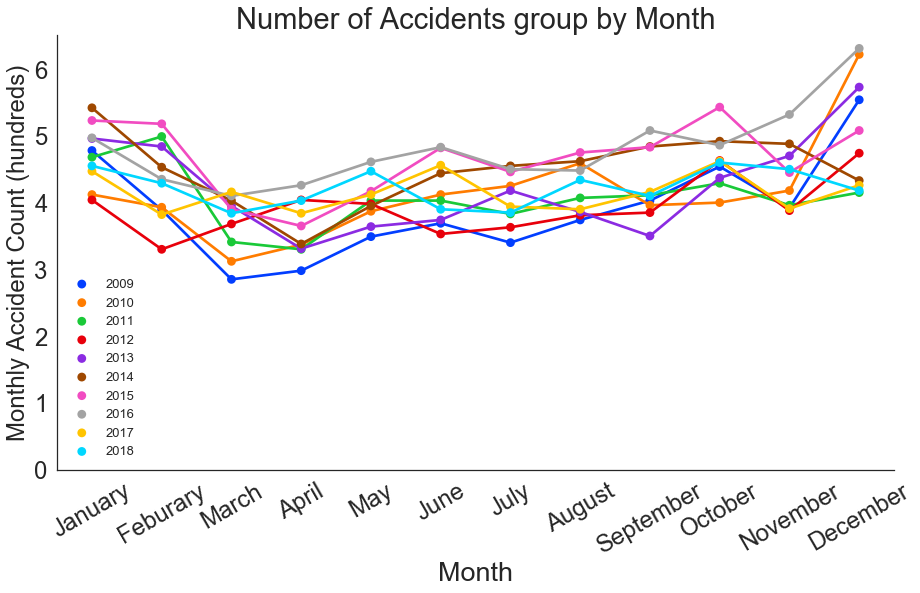

In [9]:
ACCDMONTH_ACCDYEAR = df.groupby(['ACCDMONTH','ACCDYEAR']).count()['DOCTNMBR'].to_frame().reset_index()
fontSize = 24
sns.set(font_scale=1.5,style="white")
plt.figure(figsize=(15,8))
ACCDMONTH_ACCDYEAR_POINTPLOT = sns.pointplot(x='ACCDMONTH', y='DOCTNMBR', hue='ACCDYEAR', data=ACCDMONTH_ACCDYEAR, palette = 'bright',capsize=0.1, frameon = False)
ACCDMONTH_ACCDYEAR_LEG = ACCDMONTH_ACCDYEAR_POINTPLOT.get_legend_handles_labels()[0]

# set up legend
x_tick_year_list = [i for i in range(2009,2019)]
ACCDMONTH_ACCDYEAR_POINTPLOT.legend(ACCDMONTH_ACCDYEAR_LEG, x_tick_year_list, frameon = False, title='',fontsize = 13)
ACCDMONTH_ACCDYEAR_POINTPLOT.set_title('Number of Accidents group by Month', fontsize = fontSize + 5)
ACCDMONTH_ACCDYEAR_POINTPLOT.set_xlabel('Month', fontsize = fontSize + 3)
ACCDMONTH_ACCDYEAR_POINTPLOT.set_ylabel('Monthly Accident Count (hundreds)', fontsize = fontSize)

# set up x,y tick labels
month_list = ["January","Feburary","March","April","May","June","July","August","September","October","November","December"]
ACCDMONTH_ACCDYEAR_POINTPLOT.set_xticklabels(month_list, rotation=30, fontsize = fontSize)
ticks = ACCDMONTH_ACCDYEAR_POINTPLOT.get_yticks()//100
axes = ACCDMONTH_ACCDYEAR_POINTPLOT.axes
from collections import deque
tickQue = deque(ticks)
zeroer = [0,1.0,1.5,2.0]
for i in zeroer[::-1]:
    tickQue.appendleft(i)
yTick = [0]
for i in range(len(tickQue)):
    if i%2:
        yTick.append(int(tickQue[i]))
axes.set_ylim(0,)
ACCDMONTH_ACCDYEAR_POINTPLOT.set_yticklabels(yTick,fontsize = fontSize)

# set right and top border to invisible
ACCDMONTH_ACCDYEAR_POINTPLOT.spines['right'].set_visible(False)
ACCDMONTH_ACCDYEAR_POINTPLOT.spines['top'].set_visible(False)

## Next Question: When did most INJURY and FATAL cases happened?

Our main goal is to reduce the injury or death from car accidents, so we focus on the INJURY and FATAL INJURY cases and try to find characteristics or patterns from them.

### Severity Distribution
- To answer the question raised above, I first plot the distribution of FATAL and INJURY cases over month.

In [10]:
# Create fatal case data
df["FATALFLAG"] = ""
df["INJFLAG"] = ""
for i in range(len(df["ACCDSVR"])):
    #print(df["ACCDSVR"][i])
    if df["ACCDSVR"][i] == 'FAT':
        df["FATALFLAG"][i] = 'FAT'
        df["INJFLAG"][i] = None
    elif df["ACCDSVR"][i] == 'INJ':
        df["INJFLAG"][i] = 'INJ'
        df["FATALFLAG"][i] = None
    else:
        df["FATALFLAG"][i] = None
        df["INJFLAG"][i] = None

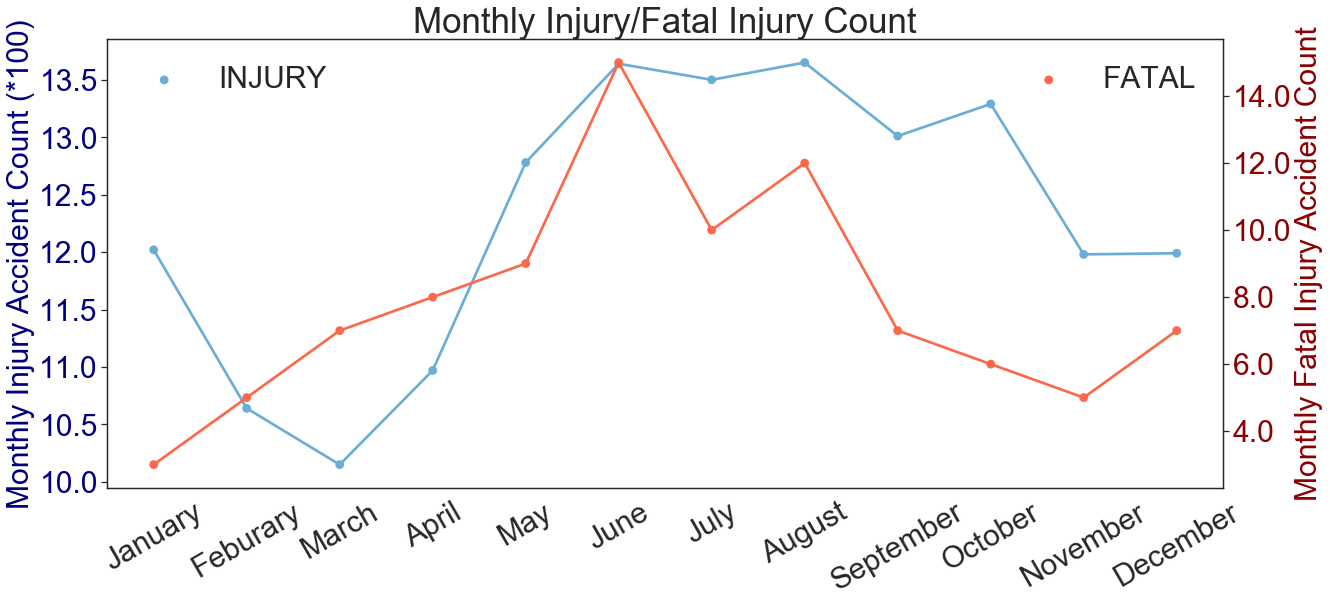

In [23]:
fig, ax1 = plt.subplots(figsize=(20, 8.27))
fontSize = 30
ax2 = ax1.twinx()
ACCDMONTH_INJURYFLAG = df.groupby(['ACCDMONTH',"INJFLAG"]).count()['DOCTNMBR'].to_frame().reset_index()
ACCDMONTH_FATALFLAG = df.groupby(['ACCDMONTH',"FATALFLAG"]).count()['DOCTNMBR'].to_frame().reset_index()
ACCDMONTH_INJURYFLAG = df.groupby(['ACCDMONTH',"INJFLAG"]).count()['DOCTNMBR'].to_frame().reset_index()
ACCDMONTH_INJURYFLAG_POINTPLOT = sns.pointplot(x='ACCDMONTH', y='DOCTNMBR', hue='INJFLAG', data=ACCDMONTH_INJURYFLAG, palette = "Blues",capsize=0.1, ax = ax1)
ACCDMONTH_FATALFLAG_POINTPLOT = sns.pointplot(x='ACCDMONTH', y='DOCTNMBR', hue='FATALFLAG', data=ACCDMONTH_FATALFLAG, palette = 'Reds',capsize=0.1, ax = ax2)

# set left legend
ACCDMONTH_INJURYFLAG_LEG = ACCDMONTH_INJURYFLAG_POINTPLOT.get_legend_handles_labels()[0]
ACCDMONTH_INJURYFLAG_POINTPLOT.legend(ACCDMONTH_INJURYFLAG_LEG, ["INJURY"], frameon = False, title='',fontsize = fontSize,loc='upper left')

# set right legend
ACCDMONTH_FATALFLAG_LEG = ACCDMONTH_FATALFLAG_POINTPLOT.get_legend_handles_labels()[0]
ACCDMONTH_FATALFLAG_POINTPLOT.legend(ACCDMONTH_FATALFLAG_LEG, ["FATAL"], frameon = False, title='',fontsize = fontSize,loc='upper right')


# set left axis 
ACCDMONTH_INJURYFLAG_POINTPLOT.set_title('Monthly Injury/Fatal Injury Count', fontsize = fontSize + 5)
ACCDMONTH_INJURYFLAG_POINTPLOT.set_xlabel('', fontsize = fontSize + 3)
ACCDMONTH_INJURYFLAG_POINTPLOT.set_ylabel('Monthly Injury Accident Count (*100)', fontsize = fontSize,color = "navy")
ticks = ACCDMONTH_INJURYFLAG_POINTPLOT.get_yticks()/100
ACCDMONTH_INJURYFLAG_POINTPLOT.set_yticklabels(ticks,fontsize = fontSize, color = "navy")

#set right axis
ACCDMONTH_FATALFLAG_POINTPLOT.set_ylabel('Monthly Fatal Injury Accident Count', fontsize = fontSize,color = "darkred")
ticks = ACCDMONTH_FATALFLAG_POINTPLOT.get_yticks()
ACCDMONTH_FATALFLAG_POINTPLOT.set_yticklabels(ticks,fontsize = fontSize,color = "darkred")

# set up x,y tick labels
month_list = ["January","Feburary","March","April","May","June","July","August","September","October","November","December"]
ACCDMONTH_INJURYFLAG_POINTPLOT.set_xticklabels(month_list, rotation=30, fontsize = fontSize)
ticks = ACCDMONTH_INJURYFLAG_POINTPLOT.get_yticks()/100
axes = ACCDMONTH_INJURYFLAG_POINTPLOT.axes
